# Problem Statement
Perform the following operations using Python on the Air quality and Heart Diseases data sets
<ol>
    <li>Data cleaning</li>
    <li>Error correcting</li>
    <li>Data transformation</li>
    <li>Data integration</li>
    <li>Data model building</li>
</ol>

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Datasets

In [2]:
air = pd.read_csv("AirQuality.csv",sep=';')
heart = pd.read_csv("heart1.csv")

Air Quality dataset

In [3]:
air.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


Heart dataset

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 1) Data Cleaning

### Air

In [5]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [6]:
#Dropping CO(GT) and Unnamed columns
air.drop(['CO(GT)','Unnamed: 15','Unnamed: 16'],axis = 1,inplace = True)

In [7]:
air.sample(5)

,Date,Time,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
1120,26/04/2004,10.00.00,941.0,76.0,"5,4",782.0,110.0,1102.0,83.0,1328.0,668.0,"18,3","32,3","0,6760"
8291,19/02/2005,05.00.00,922.0,-200.0,"2,4",611.0,108.0,962.0,89.0,867.0,893.0,"1,9","60,0","0,4276"
7516,17/01/2005,22.00.00,1087.0,-200.0,"8,7",926.0,340.0,715.0,153.0,1053.0,1390.0,"5,3","55,0","0,4921"
415,28/03/2004,01.00.00,1274.0,101.0,"8,3",912.0,111.0,939.0,97.0,1451.0,1188.0,"10,3","58,1","0,7278"
6250,26/11/2004,04.00.00,1090.0,-200.0,"6,6",841.0,209.0,757.0,79.0,1202.0,989.0,"8,7","77,6","0,8753"


In [8]:
air.shape

(9471, 14)

In [9]:
air.isnull().sum()

Date             114
Time             114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [10]:
air.dropna(inplace=True)

In [11]:
air.shape

(9357, 14)

In [12]:
#Formatting some object columns from strings to floats

air.replace(to_replace=',',value='.',regex=True,inplace=True) 
cols=['C6H6(GT)', 'T', 'RH', 'AH']
for i in cols:
    air[i] = pd.to_numeric(air[i],errors='coerce')

In [49]:
air.shape

(8991, 11)

### Heart

In [13]:
heart.shape

(1025, 14)

In [14]:
heart.duplicated().sum()

723

In [15]:
heart.drop_duplicates(inplace=True)
heart.shape

(302, 14)

## 2) Error correcting

### Air

In [16]:
#Replacing -200 to NaN 
air.replace(to_replace=-200,value=np.nan,inplace=True)

In [17]:
air.sample(5)

,Date,Time,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
4041,26/08/2004,03.00.00,790.0,NaN,2.1,590.0,NaN,1122.0,NaN,1257.0,493.0,23.8,44.8,1.3061
7333,10/01/2005,07.00.00,1162.0,NaN,6.7,843.0,303.0,685.0,104.0,1336.0,1027.0,12.3,73.3,1.0448
7551,19/01/2005,09.00.00,1036.0,NaN,7.3,868.0,314.0,732.0,152.0,1158.0,958.0,7.1,65.4,0.6644
3332,27/07/2004,14.00.00,915.0,NaN,6.4,828.0,90.0,928.0,87.0,1474.0,630.0,31.7,25.6,1.1790
346,25/03/2004,04.00.00,858.0,29.0,0.9,490.0,18.0,1707.0,28.0,1212.0,378.0,9.3,72.3,0.8496


In [18]:
air.isnull().sum()

Date                0
Time                0
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [19]:
NMHC_ratio = air['NMHC(GT)'].isna().sum()/len(air['NMHC(GT)'])
print('The NMHC(GT) sensor has {:.2f}% of missing data.'.format(NMHC_ratio*100))

#Removing NMHC(GT) sensor due to amount of null values
air.drop('NMHC(GT)', axis=1, inplace=True) 

The NMHC(GT) sensor has 90.23% of missing data.


## 3) Data Transformation

### Air

In [ ]:
air['Date']
air['Time']

In [20]:
#Formatting Date and Time to datetime type

air['Date'] = pd.to_datetime(air['Date'],dayfirst=True) 

air['Time'] = pd.to_datetime(air['Time'],format= '%H.%M.%S' ).dt.time

In [21]:
air.head()

,Date,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


## 4) Data integration

### Heart

In [22]:
new_sex=pd.get_dummies(data=heart['sex'],prefix='sex')
new_sex.head()

,sex_0,sex_1
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [23]:
new_cp=pd.get_dummies(heart['cp'],prefix='chestPain')
new_cp.head()

,chestPain_0,chestPain_1,chestPain_2,chestPain_3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [24]:
new_exang=pd.get_dummies(heart['exang'],prefix='exang')
new_exang.head()

,exang_0,exang_1
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [25]:
new_slope=pd.get_dummies(heart['slope'],prefix='slope')
new_slope.head()

,slope_0,slope_1,slope_2
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,0,1,0


In [45]:
new_thal=pd.get_dummies(heart['thal'],prefix='thal')
new_thal.head()

,thal_0,thal_1,thal_2,thal_3
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,1,0


In [27]:
new_ca=pd.get_dummies(heart['ca'],prefix='ca')
new_ca.head()

,ca_0,ca_1,ca_2,ca_3,ca_4
0,0,0,1,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,0,1,0


In [28]:
# Merge Dataframes
heart_new=pd.concat([heart,new_sex,new_cp,new_ca,new_thal,new_exang,new_slope],axis=1)

In [29]:
heart_new.drop(['sex','cp','thal','exang','ca','slope'],axis=1,inplace=True)
heart_new.head()

,age,trestbps,chol,fbs,restecg,thalach,oldpeak,target,sex_0,sex_1,...,ca_4,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,52,125,212,0,1,168,1.0,0,0,1,...,0,0,0,0,1,1,0,0,0,1
1,53,140,203,1,0,155,3.1,0,0,1,...,0,0,0,0,1,0,1,1,0,0
2,70,145,174,0,1,125,2.6,0,0,1,...,0,0,0,0,1,0,1,1,0,0
3,61,148,203,0,1,161,0.0,0,0,1,...,0,0,0,0,1,1,0,0,0,1
4,62,138,294,1,1,106,1.9,0,1,0,...,0,0,0,1,0,1,0,0,1,0


## 5) Data model building

### Heart

#### Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [32]:
X_scaled = sc.fit_transform(X)

#### Modelling

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(241, 27) (61, 27) (241,) (61,)


In [34]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

print("Logistic Regression train score : {:.4f}".format(logreg.score(X_train, y_train)))
print("Logistic Regression test score : {:.4f}".format(logreg.score(X_test, y_test)))

Logistic Regression train score : 0.8921
Logistic Regression test score : 0.8197


In [35]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=8, random_state=0)
tree.fit(X_train, y_train)

print("Decision Tree train score : {:.4f}".format(tree.score(X_train, y_train)))
print("Decision Tree test score : {:.4f}".format(tree.score(X_test, y_test)))

Decision Tree train score : 0.9917
Decision Tree test score : 0.7213


In [36]:
pred_logreg = logreg.predict(X_test)
pred_tree = tree.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix

cm_logreg = confusion_matrix(y_test, pred_logreg)
cm_tree = confusion_matrix(y_test, pred_tree)

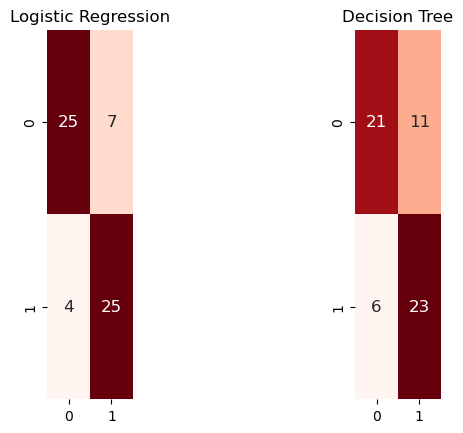

In [38]:
plt.subplot(1,5,2)
plt.title("Logistic Regression")
sns.heatmap(cm_logreg, annot=True, cmap="Reds", fmt="d", cbar=False, annot_kws={"size": 12})

plt.subplot(1,5,5)
plt.title("Decision Tree")
sns.heatmap(cm_tree, annot=True, cmap="Reds", fmt="d", cbar=False, annot_kws={"size": 12})

plt.show()

### Air

In [39]:
air.isna().sum()

Date                0
Time                0
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [40]:
air.drop(columns=['NO2(GT)','NOx(GT)'],inplace=True)

In [41]:
air.dropna(inplace=True)

In [42]:
#Creating a Regression Model of the PT08.S1 sensor:

Y = air['PT08.S1(CO)'] 
X = air.drop(['PT08.S1(CO)','Date', 'Time'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(7192, 8) (1799, 8)


In [43]:
from sklearn.ensemble import RandomForestRegressor

model_randomforest = RandomForestRegressor(n_estimators=100)

model_randomforest.fit(X_train, Y_train)

RandomForestRegressor()

In [44]:
#Evaluating the results with the R² metric
#Test data evaluation

from sklearn import metrics

pred_randomforest = model_randomforest.predict(X_test) #predicted CO concentrations

print('Random Forest Regression Model: R²={:.2f}'.format(metrics.r2_score(Y_test, pred_randomforest)))

Random Forest Regression Model: R²=0.93
